# Clean and analyze datasets

In [1]:
from Bio import SeqIO

In [4]:
ADH = "./new_dataset/raw_sequences/adhesins.fa"
ADH_60 = './new_dataset/raw_sequences/adhesins_cleaned_0.6.fa'
ADH_25 = './new_dataset/raw_sequences/adhesins_cleaned_0.25.fa'
NON_ADH = './new_dataset/raw_sequences/non_adhesins.fa'
NON_ADH_RE = './new_dataset/raw_sequences/non_adhesins_reduced.fa'
NON_ADH_60 = './new_dataset/raw_sequences/non_adhesins_reduced_cleaned_0.6.fa'
NON_ADH_25 = './new_dataset/raw_sequences/non_adhesins_reduced_cleaned_0.25.fa'

In [5]:
adhesin_sequences = list(SeqIO.parse(ADH, 'fasta'))
adhesin_sequences_60 = list(SeqIO.parse(ADH_60, 'fasta'))
adhesin_sequences_25 = list(SeqIO.parse(ADH_25, 'fasta'))

print(f'{len(adhesin_sequences)} adhesins before cleaning\n\
{len(adhesin_sequences_60)} adhesin after 60% identity cleaning\n\
{len(adhesin_sequences_25)} adhesin after 25% identity cleaning')

16699 adhesins before cleaning
12066 adhesin after 60% identity cleaning
3714 adhesin after 25% identity cleaning


### Random pick sequences from NON_ADH 

In [87]:
import random

In [89]:
random.seed(42)
non_adhesin_sequences = list(SeqIO.parse(NON_ADH, 'fasta'))
reduced_non_adhesin_sequences = []
for num in range(0, 20000):
    num = random.randrange(1, len(non_adhesin_sequences))
    reduced_non_adhesin_sequences.append(non_adhesin_sequences[num])
print(f'{len(reduced_non_adhesin_sequences)} non adhesin sequences extracted')

20000 non adhesin sequences extracted


In [27]:
# write outfile
# consider similar lengh as adh dataset?
SeqIO.write(reduced_non_adhesin_sequences, NON_ADH_RE, 'fasta')

20000

In [52]:
# count after clustering
reduced_cleaned_non_adhesin_sequences = list(SeqIO.parse(NON_ADH_60, 'fasta'))
print(f'{len(reduced_cleaned_non_adhesin_sequences)} non adhesin sequences extracted and clustered')

11259 non adhesin sequences extracted and clustered


In [59]:
# verify sequence lengh in datasets
import matplotlib.pyplot as plt

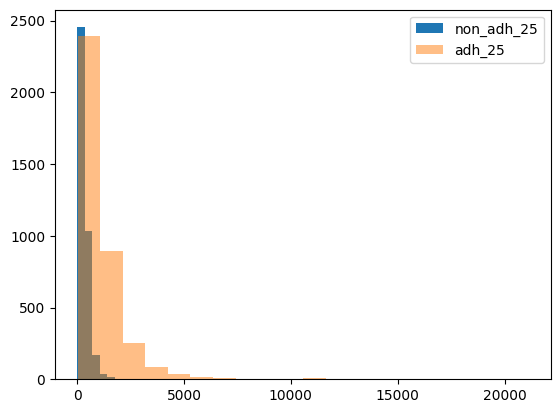

adhesins lengh 1166.2501346257404, non adhesin lengh 323.7590296495957


In [80]:
non_adh_25 = list(SeqIO.parse(NON_ADH_25, 'fasta'))
adh_25 = list(SeqIO.parse(ADH_25, 'fasta'))

non_adh_25_lengh=[]
for protein in non_adh_25:
    non_adh_25_lengh.append(len(protein.seq))
    
adh_25_lengh=[]
for protein in adh_25:
    adh_25_lengh.append(len(protein.seq))
    
plt.hist(non_adh_25_lengh, label='non_adh_25')
plt.hist(adh_25_lengh, 20, alpha=0.5, label='adh_25')
plt.legend()
plt.show()

# the mean lengh of adhesin proteins is 1200 vs 320 of non adhesins
print(f'adhesins lengh {sum(adh_25_lengh)/len(adh_25_lengh)}, non adhesin lengh \
{sum(non_adh_25_lengh)/len(non_adh_25_lengh)}')

## Count sequences per category

In [39]:
from Bio import SeqIO
import os
import copy

ADH_25 = './new_dataset/raw_sequences/adhesins_cleaned_0.25.fa'
ADH_60 = './new_dataset/raw_sequences/adhesins_cleaned_0.6.fa'

In [40]:
# initiate dictionaries with all sequences from all motifs
sequence_dictionary_60 = {}
dir_ = 'data/new_dataset/raw_sequences/'
for file in os.listdir(dir_):
    if len(file) < 11:
        motif_name = file.split('.')[0]
        motif_sequences = list(SeqIO.parse(os.path.join(dir_, file), 'fasta'))
        sequence_dictionary_60[motif_name] = {seq.id:0 for seq in motif_sequences}
sequence_dictionary_25 = copy.deepcopy(sequence_dictionary_60)

In [41]:
# fill dictionaries
adh_25_sequences = list(SeqIO.parse(ADH_25, 'fasta'))
for seq in adh_25_sequences:
    for motif in sequence_dictionary_25:
        if seq.id in sequence_dictionary_25[motif]:
            sequence_dictionary_25[motif][seq.id] = 1
            
adh_60_sequences = list(SeqIO.parse(ADH_60, 'fasta'))
for seq in adh_60_sequences:
    for motif in sequence_dictionary_60:
        if seq.id in sequence_dictionary_60[motif]:
            sequence_dictionary_60[motif][seq.id] = 1

In [43]:
# count
print('Protein count per motif at 60% and 25% cleaning:')
for motif in sequence_dictionary_25:
    count_60 = sum(sequence_dictionary_60[motif].values())
    count_25 = sum(sequence_dictionary_25[motif].values())
    print(f'{motif} {count_60} {count_25}')

Protein count per motif at 60% and 25% cleaning:
PF08363 44 15
PF05737 484 153
PF08829 2 2
PF18220 7 5
PF17480 1 1
PF12799 5932 1719
PF18573 313 158
PF03212 431 136
PF07979 1 1
PF02216 5 4
PF15403 1 1
PF18651 121 37
PF05658 1299 414
PF08341 409 129
PF07675 288 76
PF18304 5 1
PF09160 20 5
PF18652 73 22
PF09403 16 10
PF18873 6 2
PF18483 491 234
PF10425 48 33
PF11966 7 1
PF15401 7 5
PF07691 2089 569


### Create additional negative dataset for testing purpose

In [6]:
import random

In [7]:
random.seed(42)
non_adhesin_sequences = list(SeqIO.parse(NON_ADH, 'fasta'))
reduced_non_adhesin_sequences = []
for num in range(0, 40000):
    num = random.randrange(1, len(non_adhesin_sequences))
    reduced_non_adhesin_sequences.append(non_adhesin_sequences[num])
print(f'{len(reduced_non_adhesin_sequences)} non adhesin sequences extracted')

40000 non adhesin sequences extracted


In [9]:
SeqIO.write(reduced_non_adhesin_sequences, './new_dataset/additional_control/non_adhesins.fasta', 'fasta')

40000

#### clean the dataset at 25% identity with CD-HIT and split it

In [10]:
cleaned_sequences = list(SeqIO.parse('./new_dataset/additional_control/non_adhesins_cleaned.fasta', 'fasta'))
print(f'{len(cleaned_sequences)} sequences after removing redundant sequences')

5471 sequences after removing redundant sequences


In [11]:
# keep 3700 sequences for training/val/test, use the rest for addional test
SeqIO.write(cleaned_sequences[:3700], './new_dataset/additional_control/negative_control.fasta', 'fasta')
SeqIO.write(cleaned_sequences[3701:], './new_dataset/additional_control/additional_negative_control.fasta', 'fasta')

1770

#### featurize sequences

In [32]:
import os

def featurizer(input_fasta, output_dir, type_='neg', iFeature='iFeature/iFeature.py',\
              features = ['AAC', 'DPC', 'CTDC', 'CTDT', 'CTDD']):
    """Perform iFeature featurization of sequences"""
    
    for feature in features:
        command = f'python {iFeature} --file {input_fasta} --type {feature} --out \
        {os.path.join(output_dir, feature.lower()+"_cleaned_"+type_+".out")}'
        os.system(command)


In [33]:
featurizer('./new_dataset/additional_control/negative_control.fasta', './spaan/data/additional_negative/')
featurizer('./new_dataset/additional_control/additional_negative_control.fasta',\
           './spaan/data/additional_negative_control/')

Descriptor type: AAC
Descriptor type: DPC
Descriptor type: CTDC
Descriptor type: CTDT
Descriptor type: CTDD
Descriptor type: AAC
Descriptor type: DPC
Descriptor type: CTDC
Descriptor type: CTDT
Descriptor type: CTDD
